# 3FACTORES: CONSTRUCCIÓN DE FACTORES Y SEÑALES

Este notebook demuestra el funcionamiento del módulo 3factores, que construye señales de inversión basadas en factores como momentum, volatilidad y beta.

In [1]:
import sys
import importlib
sys.path.append('../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importar módulos (los nombres que empiezan con números requieren importlib)
datos = importlib.import_module('1datos')
factores = importlib.import_module('3factores')

print("Librerías importadas correctamente")

Librerías importadas correctamente


In [2]:
ruta_csv = '../data/prod_long_sharpe_u50_20260116_v5_train_dataset.csv'
retornos = datos.cargar_retornos(ruta_csv)
stats = datos.calcular_estadisticas_basicas(retornos)

print(f"Datos cargados: {retornos.shape}")

Datos cargados: 1760 días, 50 activos
Datos cargados: (1760, 50)


## Paso 1: Calcular Momentum 12-2

Top 10 activos por Momentum 12-2:
asset38    0.470194
asset29    0.423543
asset21    0.415622
asset36    0.355591
asset39    0.338988
asset35    0.279812
asset2      0.27833
asset40    0.272448
asset46    0.265167
asset6     0.263442
Name: 1759, dtype: object


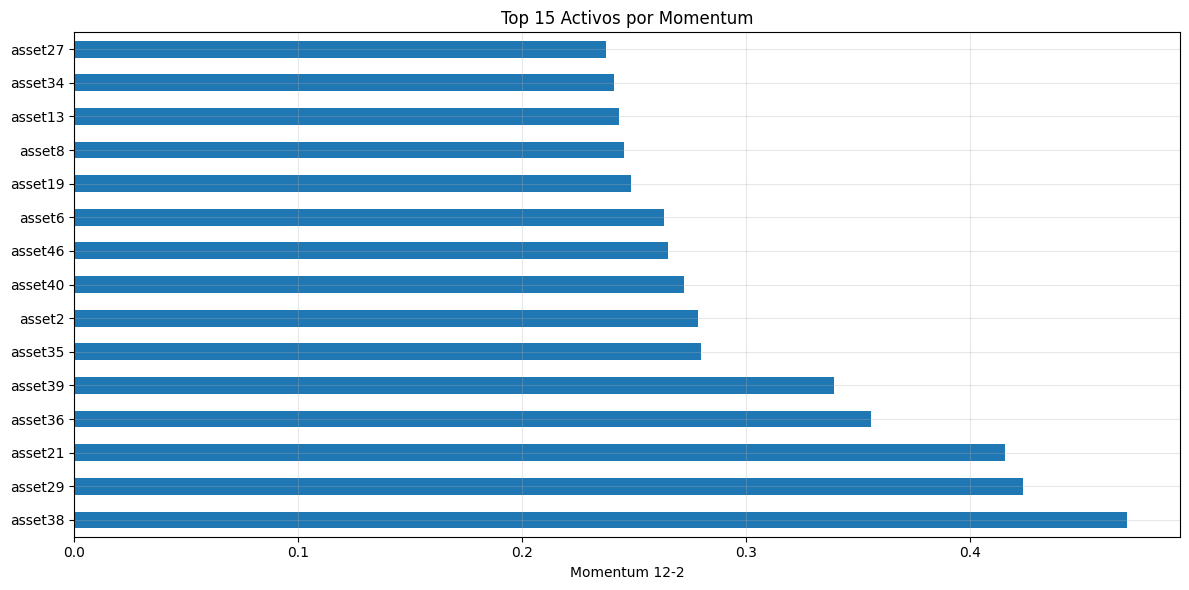

In [3]:
momentum = factores.calcular_momentum_12_2(retornos)
mom_actual = momentum.iloc[-1].dropna()

print("Top 10 activos por Momentum 12-2:")
print(mom_actual.sort_values(ascending=False).head(10))

# Visualizar
plt.figure(figsize=(12, 6))
mom_actual.sort_values(ascending=False).head(15).plot(kind='barh')
plt.xlabel('Momentum 12-2')
plt.title('Top 15 Activos por Momentum')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('outputs/modulo3_momentum.png', dpi=300, bbox_inches='tight')
plt.show()

## Paso 2: Calcular Volatilidad Rolling

In [4]:
volatilidades = factores.calcular_volatilidad_rolling(retornos, ventanas=[21, 63, 252])
vol_actual_63d = volatilidades['vol_63d'].iloc[-1].dropna()

print("Top 10 activos con menor volatilidad (63 días):")
print(vol_actual_63d.sort_values().head(10))

# Visualizar
plt.figure(figsize=(12, 6))
vol_actual_63d.sort_values().head(15).plot(kind='barh', color='orange')
plt.xlabel('Volatilidad Anualizada (%)')
plt.title('Top 15 Activos con Menor Volatilidad (63 días)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('outputs/modulo3_volatilidad.png', dpi=300, bbox_inches='tight')
plt.show()

ValueError: Data must be 1-dimensional, got ndarray of shape (1760, 50) instead

## Paso 3: Calcular Betas vs Mercado

Top 10 activos con menor beta:
asset19   -0.216684
asset20    0.056485
asset23    0.243671
asset25    0.277789
asset45    0.351040
asset49    0.384243
asset11    0.471415
asset34    0.518559
asset35    0.521664
asset42    0.562742
dtype: float64

Beta promedio: 1.0040
Beta mediana: 1.0756


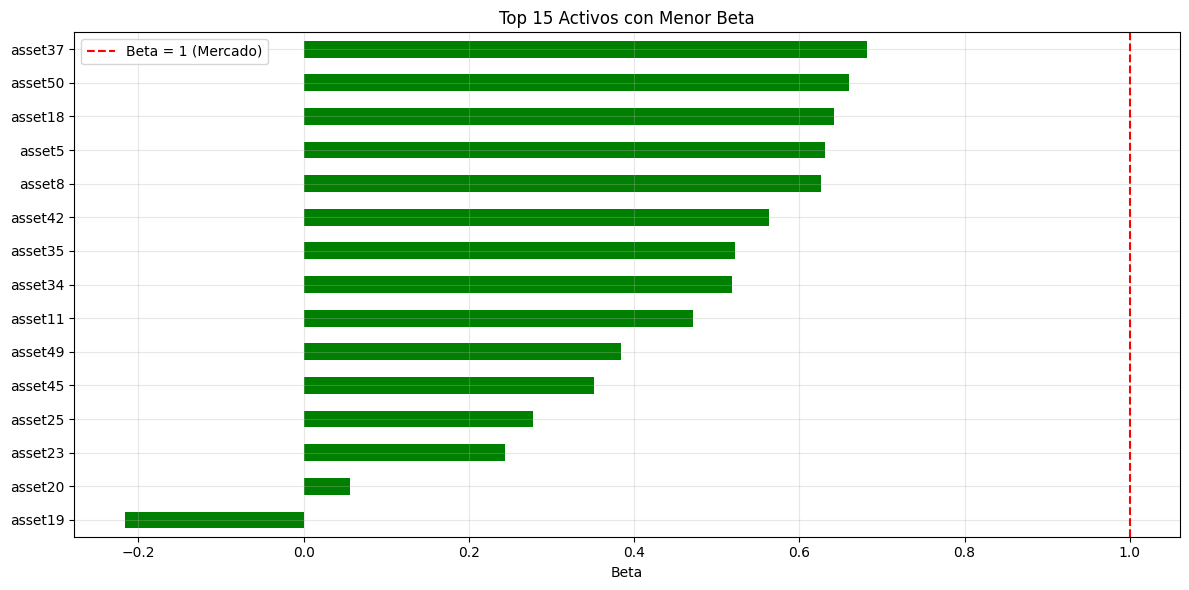

In [5]:
betas = factores.calcular_betas(retornos, ventana=252)

print("Top 10 activos con menor beta:")
print(betas.sort_values().head(10))
print(f"\nBeta promedio: {betas.mean():.4f}")
print(f"Beta mediana: {betas.median():.4f}")

# Visualizar
plt.figure(figsize=(12, 6))
betas.sort_values().head(15).plot(kind='barh', color='green')
plt.xlabel('Beta')
plt.title('Top 15 Activos con Menor Beta')
plt.axvline(x=1.0, color='r', linestyle='--', label='Beta = 1 (Mercado)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('outputs/modulo3_betas.png', dpi=300, bbox_inches='tight')
plt.show()

## Paso 4: Normalizar Señales

In [6]:
senales = {
    'momentum': mom_actual,
    'vol_63d': -vol_actual_63d,  # Negativo porque queremos baja vol
    'beta': -betas,  # Negativo para favorecer baja beta
    'sharpe_hist': stats['sharpe_historico']
}

senales_norm = factores.normalizar_senales(senales)

print("Señales normalizadas (z-scores):")
print(senales_norm.head(10))
print(f"\nVerificación de normalización:")
print(f"  Media por columna: {senales_norm.mean().values}")
print(f"  Std por columna: {senales_norm.std().values}")

NameError: name 'vol_actual_63d' is not defined

## Paso 5: Construir Matriz de Características

In [7]:
X, nombres_factores = factores.construir_matriz_caracteristicas(senales_norm)

print(f"Matriz X shape: {X.shape}")
print(f"Factores: {nombres_factores}")
print(f"\nCaracterísticas de X:")
print(f"  Media por columna: {X.mean(axis=0)}")
print(f"  Std por columna: {X.std(axis=0)}")

NameError: name 'senales_norm' is not defined

## Paso 6: Ranking Multifactorial

In [8]:
ranking = factores.crear_ranking_multifactorial(senales_norm)

print("Top 20 activos por Ranking Multifactorial:")
print(ranking.head(20))

# Visualizar
plt.figure(figsize=(12, 8))
ranking.head(20).plot(kind='barh', color='purple')
plt.xlabel('Score Multifactorial')
plt.title('Top 20 Activos por Ranking Multifactorial')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('outputs/modulo3_ranking.png', dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'senales_norm' is not defined

## Resumen del módulo 3factores

El módulo 3factores ha completado exitosamente:

1. Cálculo de momentum 12-2 para cada activo
2. Cálculo de volatilidad rolling en múltiples ventanas
3. Cálculo de betas vs mercado
4. Normalización de señales mediante z-scores
5. Construcción de matriz de características X
6. Ranking multifactorial combinando señales

La matriz X y las señales están listas para ser usadas en el módulo 4multifactorial (Optimización Multifactorial).